## Introducción
El TFT es un juego creado por Riot el cual ha ido creciendo conforme ha ido pasando el tiempo, pero debido a su complejidad de cara al jugador nuevo puede llegar a ser un tanto confuso y tedioso sus mecanicas. debido a esto he decidido crear este modelo de prediccion de partdas que ayudara al jugadar a comprender de manera mas didactica el Meta, esto hara que el aprendizaje sea mas llevadero

### Lbrerias

In [1]:
from utils import *
from train import *
# from prediction import *
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('Data/Train.csv')
path='Data/Train.csv'
data_train.head(8)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TFT7_Yasuo_item1,TFT7_Yasuo_item2,TFT7_Yone,TFT7_Yone_item0,TFT7_Yone_item1,TFT7_Yone_item2,TFT7_Zoe,TFT7_Zoe_item0,TFT7_Zoe_item1,TFT7_Zoe_item2
0,3,NA1_4371790614,TFT6_Augment_PortableForge,TFT6_Augment_Weakspot,TFT6_Augment_CyberneticImplants2,NaN,NaN,1.0,NaN,1.0,...,ShimmerscaleDravensAxe,MadredsBloodrazor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NA1_4371790614,TFT6_Augment_PortableForge,TFT6_Augment_CelestialBlessing1,TFT7_Augment_BigFriend2,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NA1_4371790614,TFT7_Augment_AxiomArc2,TFT6_Augment_SecondWind1,TFT6_Augment_CyberneticImplants2,NaN,0.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NA1_4371790614,TFT7_Augment_ShapeshifterBeastsDen,TFT6_Augment_CelestialBlessing1,TFT6_Augment_PortableForge,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NA1_4371790614,TFT6_Augment_Electrocharge2,TFT6_Augment_TinyTitans,TFT7_Augment_RagewingEmblem,NaN,NaN,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NA1_4371790614,TFT6_Augment_LudensEcho2,TFT6_Augment_SecondWind1,TFT7_Augment_MageEmblem,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,GuinsoosRageblade,SpearOfShojin,StatikkShiv
6,8,NA1_4371790614,TFT6_Augment_CelestialBlessing2,TFT6_Augment_Weakspot,TFT7_Augment_AssassinEmblem,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NA1_4371790614,TFT7_Augment_GadgetExpert,TFT6_Augment_CelestialBlessing1,TFT6_Augment_Diversify2,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El data set que se uso contiene multiples variables, las cuales se dividen en 5 grandes grupos:
- Posicionamiento: lugar que quedo al terminar ls partida.
- Aumento: potenciadores adquiridos a lo largo de la partida.
- Sinergias: sinergias que habian entre todos los personajes de su tablero.
- Personajes: Personajes que el jugador tenia en su tablero.
- Items: Items que tiene cada personaje en tablero.

El dataset tiene un tamaño de 49 144 filas por 269 columnas

In [3]:
limpieza(show=True)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,1,1,1,1,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,1,1,1,1.0,0.0,1.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,3,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,0,1,1,1,3,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0,1,1,1,3,2.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
limpieza(plot=4)

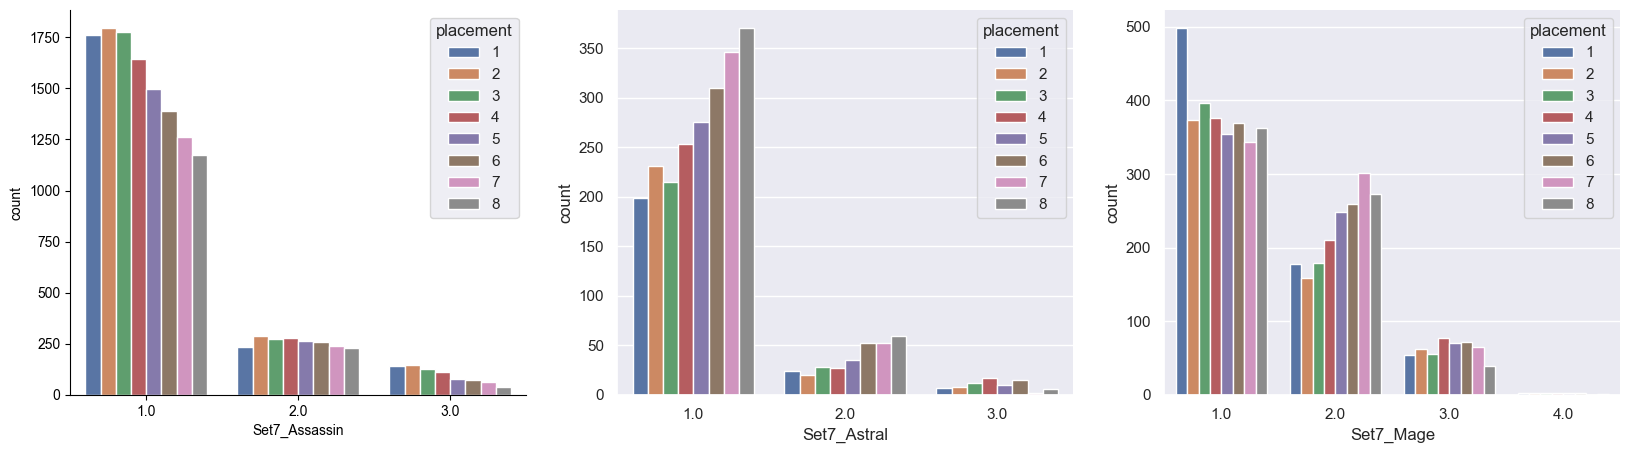

In [2]:
limpieza(plot=1)

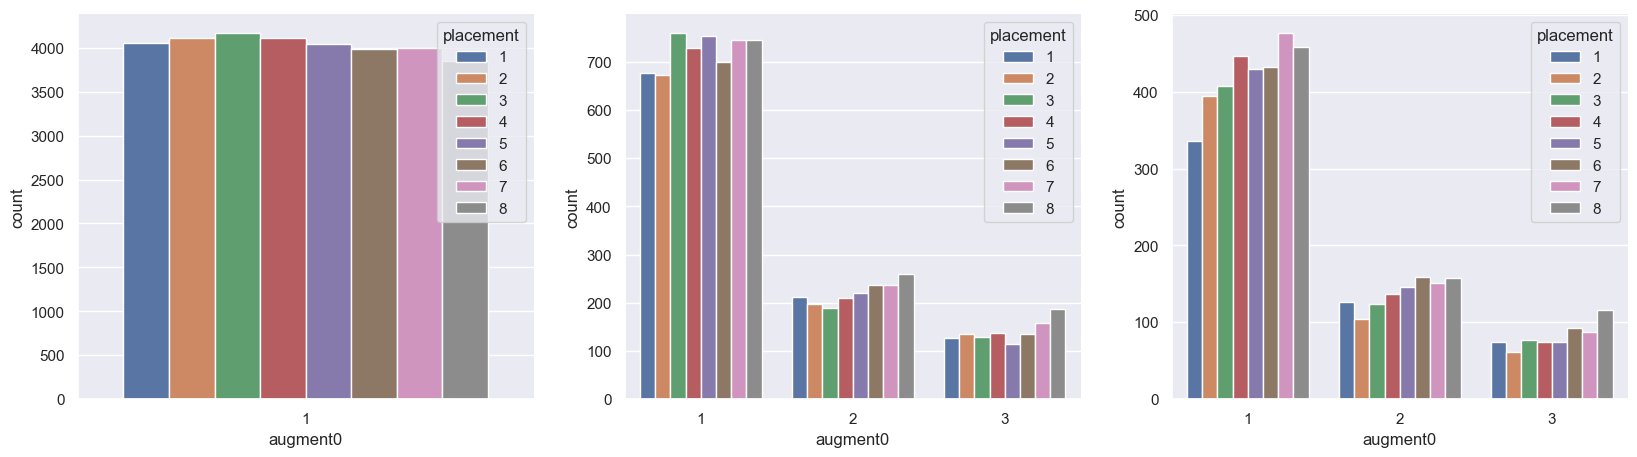

In [3]:
limpieza(plot=2)

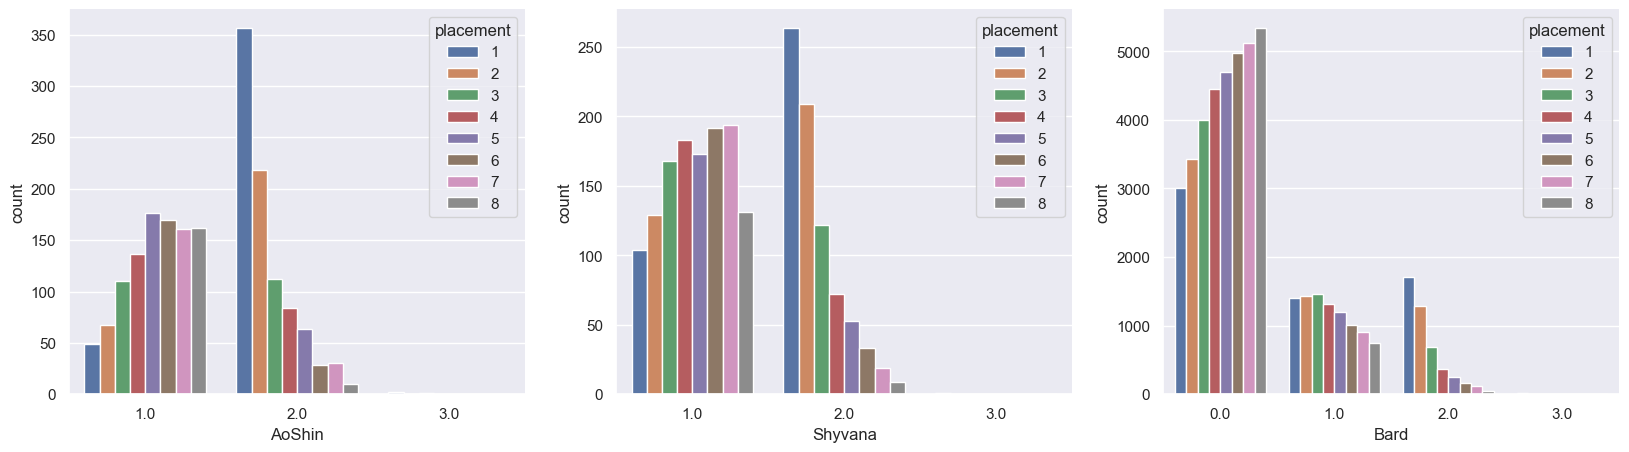

In [4]:
limpieza(plot=3)

In [2]:
limpieza_2()

In [2]:
modelado()